In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('cp_rec_df/Crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df.columns = df.columns.str.lower()
df.columns

Index(['n', 'p', 'k', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
float_cols = df.dtypes[df.dtypes == 'float64'].index.to_list()

In [10]:
for col in float_cols:
    df[col] = np.round(df[col], 2)

In [11]:
df.head()

,n,p,k,temperature,humidity,ph,rainfall,label
0,90,42,43,20.88,82.00,6.50,202.94,rice
1,85,58,41,21.77,80.32,7.04,226.66,rice
2,60,55,44,23.00,82.32,7.84,263.96,rice
3,74,35,40,26.49,80.16,6.98,242.86,rice
4,78,42,42,20.13,81.60,7.63,262.72,rice


In [12]:
df['label'].nunique()

22

In [13]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

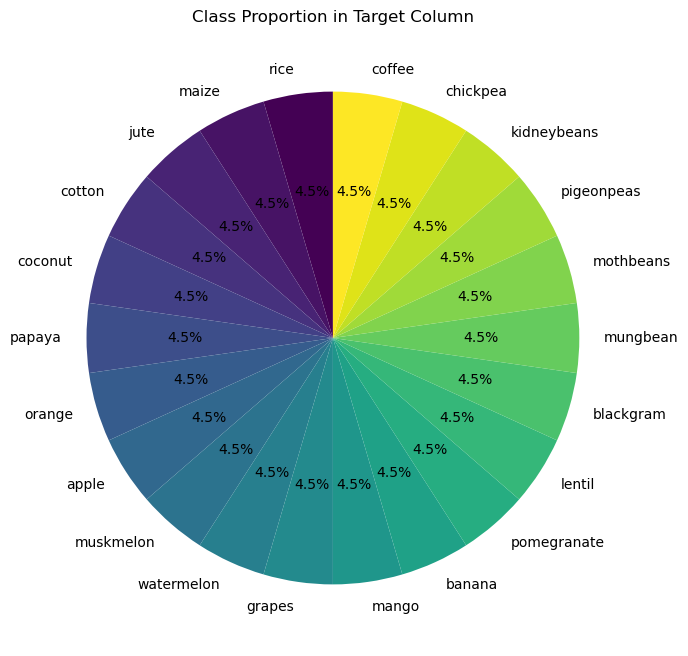

In [32]:
plt.figure(figsize=(10, 8))
df['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap="viridis")
plt.title("Class Proportion in Target Column")
plt.ylabel("")
plt.show()

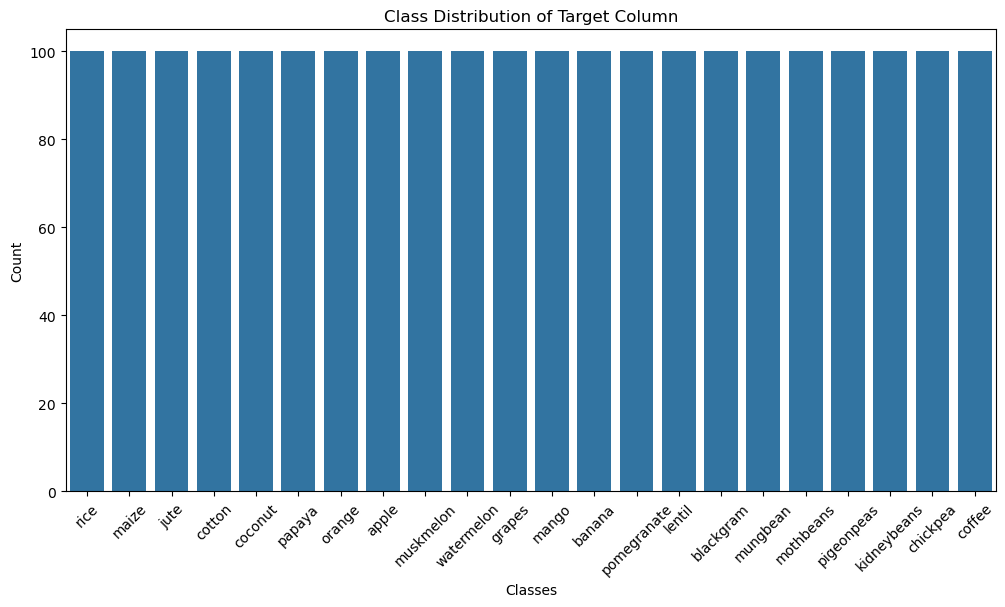

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=df, order=df['label'].value_counts().index)
plt.title("Class Distribution of Target Column")
plt.xticks(rotation=45) 
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [20]:
num_cols = df.dtypes[df.dtypes != 'object'].index.to_list()

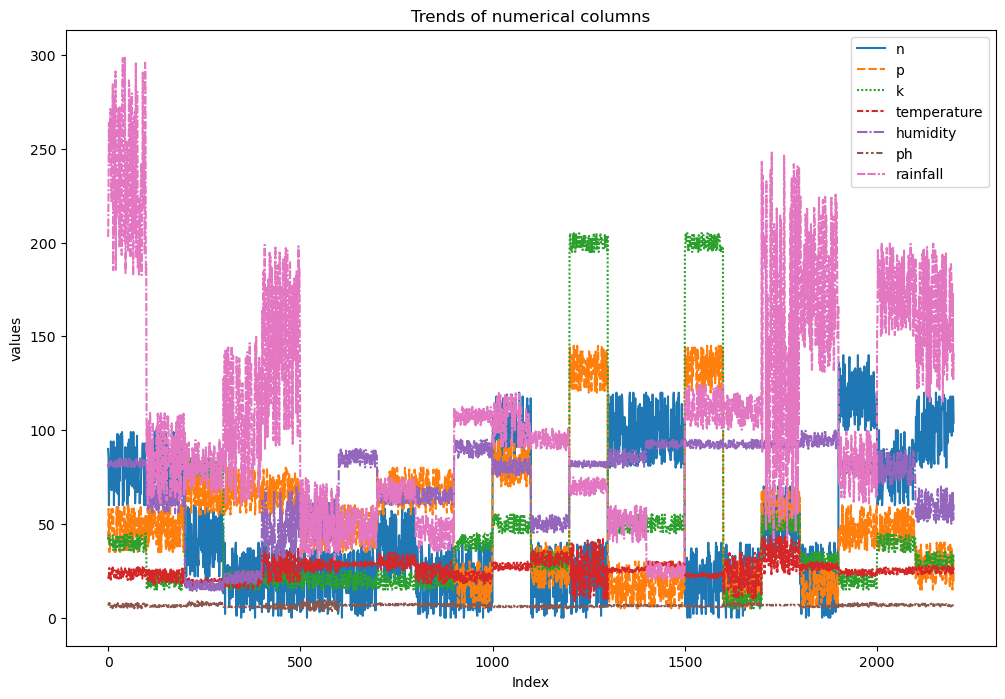

In [29]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df[num_cols])
plt.title('Trends of numerical columns')
plt.xlabel('Index')
plt.ylabel('values')
plt.show()

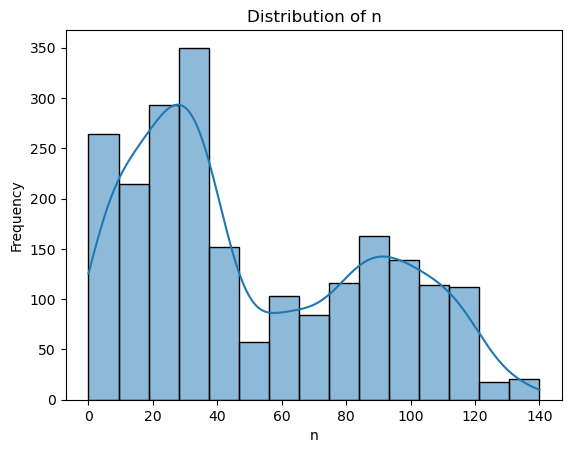

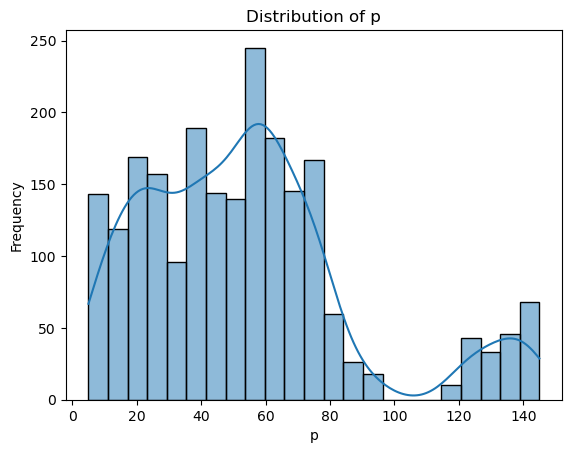

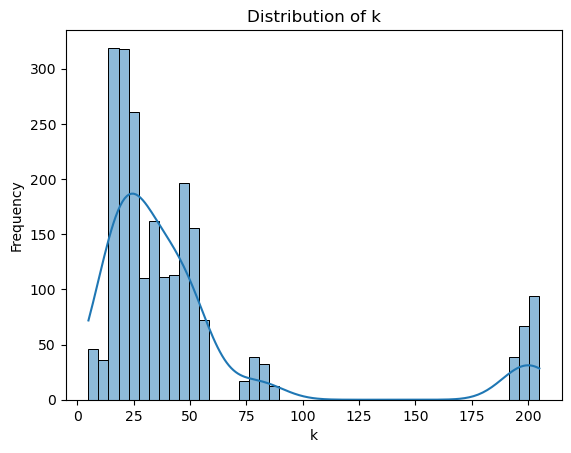

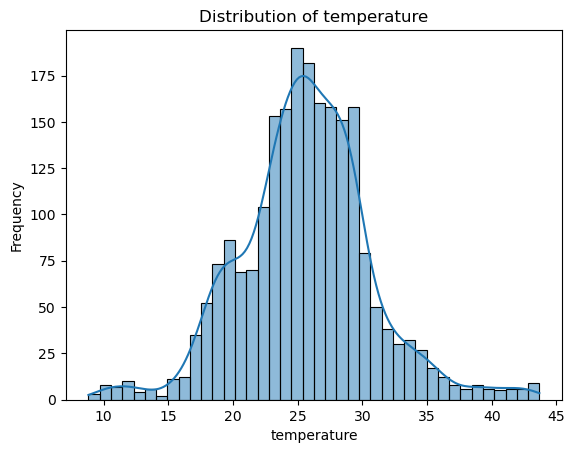

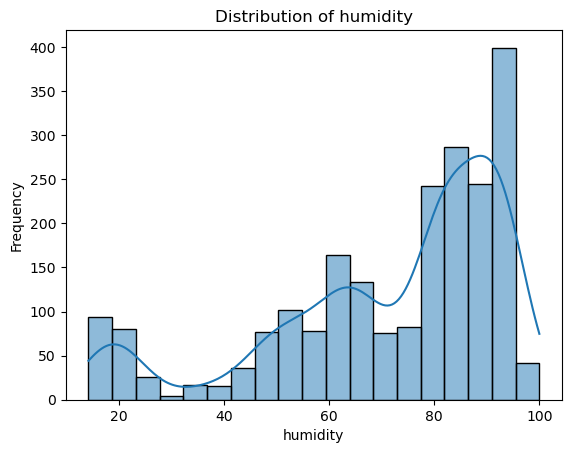

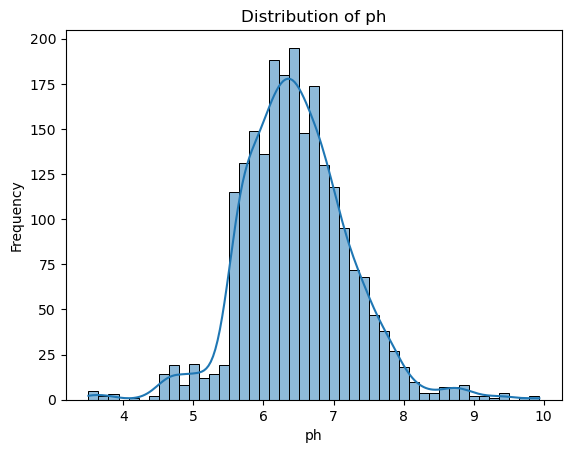

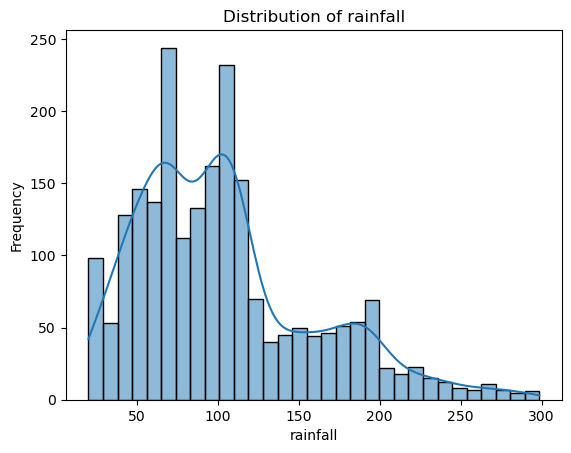

In [26]:
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


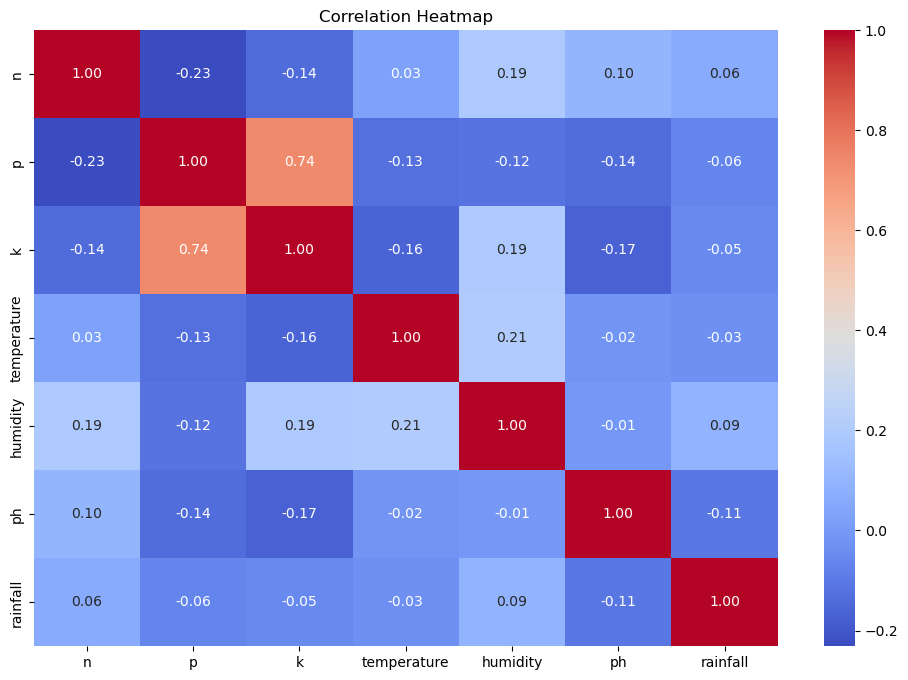

In [28]:
plt.figure(figsize=(12, 8))
correlation = df[num_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


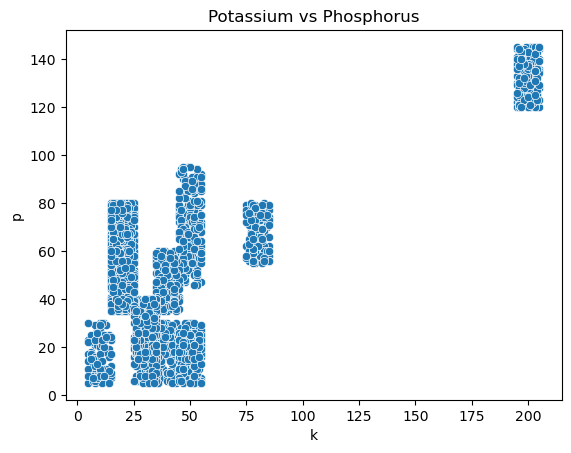

In [34]:
sns.scatterplot(x='k', y='p', data=df)
plt.title("Potassium vs Phosphorus")
plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, root_mean_squared_error, f1_score

In [37]:
le = LabelEncoder()
encoded_labels = le.fit_transform(df['label'])
encoded_labels[:10]

array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20])

In [38]:
decoded_labels = le.inverse_transform(encoded_labels)
decoded_labels[:10]

array(['rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice',
       'rice', 'rice'], dtype=object)

In [53]:
unique_crops_le = sorted(df['label'].unique().tolist())
crop_encoder_le = {crop: i for i, crop in enumerate(unique_crops_le)}
crop_encoder_le

{'apple': 0,
 'banana': 1,
 'blackgram': 2,
 'chickpea': 3,
 'coconut': 4,
 'coffee': 5,
 'cotton': 6,
 'grapes': 7,
 'jute': 8,
 'kidneybeans': 9,
 'lentil': 10,
 'maize': 11,
 'mango': 12,
 'mothbeans': 13,
 'mungbean': 14,
 'muskmelon': 15,
 'orange': 16,
 'papaya': 17,
 'pigeonpeas': 18,
 'pomegranate': 19,
 'rice': 20,
 'watermelon': 21}

In [64]:
df['encoded_label'] = encoded_labels

In [65]:
df[['label', 'encoded_label']].head()

,label,encoded_label
0,rice,20
1,rice,20
2,rice,20
3,rice,20
4,rice,20


In [66]:
df.head()

,n,p,k,temperature,humidity,ph,rainfall,label,encoded_label
0,90,42,43,20.88,82.00,6.50,202.94,rice,20
1,85,58,41,21.77,80.32,7.04,226.66,rice,20
2,60,55,44,23.00,82.32,7.84,263.96,rice,20
3,74,35,40,26.49,80.16,6.98,242.86,rice,20
4,78,42,42,20.13,81.60,7.63,262.72,rice,20


In [67]:
df.drop('label', axis = 1, inplace=True)

In [71]:
# X = df[num_cols]
# y = df['encoded_label']

In [69]:
df_full_train, df_test = train_test_split(df, test_size=0.2, stratify=df['encoded_label'], random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, stratify=df_full_train['encoded_label'], random_state=1)

In [70]:
len(df_train), len(df_test), len(df_val)

(1320, 440, 440)

In [72]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_train.head()

,n,p,k,temperature,humidity,ph,rainfall,encoded_label
0,81,45,35,26.53,80.12,6.16,218.92,20
1,117,86,53,25.20,83.56,5.70,115.86,1
2,36,56,20,25.41,49.66,7.44,31.87,13
3,65,37,40,23.36,83.60,5.33,188.41,20
4,32,56,18,20.05,65.84,7.14,46.05,10


In [79]:
print(df_train['encoded_label'].value_counts().mean())
print(df_val['encoded_label'].value_counts().mean())
print(df_test['encoded_label'].value_counts().mean())

60.0
20.0
20.0


In [81]:
y_train = df_train['encoded_label']
del df_train['encoded_label']
y_test = df_test['encoded_label']
del df_test['encoded_label']
y_val = df_val['encoded_label']
del df_val['encoded_label']

In [82]:
dv = DictVectorizer(sparse=False)

In [83]:
scaler = StandardScaler()

In [84]:
df_train_scaled = scaler.fit_transform(df_train)

In [86]:
df_train_scaled[:5]

array([[ 0.83437664, -0.25554952, -0.26018187,  0.17200479,  0.38943174,
        -0.40981683,  2.12063666],
       [ 1.81740779,  0.9833952 ,  0.09538705, -0.08880571,  0.54394783,
        -1.00063495,  0.23315206],
       [-0.39441228,  0.07685029, -0.55648931, -0.0476251 , -0.97875438,
         1.23419882, -1.30507646],
       [ 0.39747391, -0.49729483, -0.16141273, -0.44962624,  0.54574453,
        -1.47585822,  1.56186357],
       [-0.50363797,  0.07685029, -0.59599696, -1.09871101, -0.25198972,
         0.84888265, -1.04537792]])

In [87]:
train_dict = df_train.to_dict(orient= 'records')
X_train = dv.fit_transform(train_dict)
X_train[:5]

array([[ 80.12,  35.  ,  81.  ,  45.  ,   6.16, 218.92,  26.53],
       [ 83.56,  53.  , 117.  ,  86.  ,   5.7 , 115.86,  25.2 ],
       [ 49.66,  20.  ,  36.  ,  56.  ,   7.44,  31.87,  25.41],
       [ 83.6 ,  40.  ,  65.  ,  37.  ,   5.33, 188.41,  23.36],
       [ 65.84,  18.  ,  32.  ,  56.  ,   7.14,  46.05,  20.05]])

In [88]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled[:5]

array([[ 0.38943174, -0.26018187,  0.83437664, -0.25554952, -0.40981683,
         2.12063666,  0.17200479],
       [ 0.54394783,  0.09538705,  1.81740779,  0.9833952 , -1.00063495,
         0.23315206, -0.08880571],
       [-0.97875438, -0.55648931, -0.39441228,  0.07685029,  1.23419882,
        -1.30507646, -0.0476251 ],
       [ 0.54574453, -0.16141273,  0.39747391, -0.49729483, -1.47585822,
         1.56186357, -0.44962624],
       [-0.25198972, -0.59599696, -0.50363797,  0.07685029,  0.84888265,
        -1.04537792, -1.09871101]])

In [89]:
dv.get_feature_names_out()

array(['humidity', 'k', 'n', 'p', 'ph', 'rainfall', 'temperature'],
      dtype=object)

In [90]:
val_dict = df_val.to_dict(orient= 'records')
X_val = dv.transform(val_dict)
X_val_scaled = scaler.fit_transform(X_val)
test_dict = df_test.to_dict(orient= 'records')
X_test = dv.transform(test_dict)
X_test_scaled = scaler.fit_transform(X_test)

In [91]:
rf = RandomForestClassifier(n_estimators=10,
                           random_state=1,
                           n_jobs=-1)

In [92]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=1)

In [101]:
rf_pred_proba = rf.predict_proba(X_val_scaled)
rf_pred = np.argmax(rf_pred_proba, axis =1)
rf_pred[:10]

array([15, 12,  6,  4, 19,  5,  4, 17, 15,  2], dtype=int64)

In [99]:
accuracy_score(y_val, rf_pred)

0.9863636363636363

In [100]:
roc_auc_score(
                y_val, 
                rf_pred_proba, 
                multi_class='ovr'
            )

0.9999025974025973

In [105]:
scores = []
for n in range(10,201,10):
    rf = RandomForestClassifier(n_estimators=n,
                           random_state=1,
                           n_jobs=-1)
    rf.fit(X_train_scaled, y_train)
    rf_pred_prob = rf.predict_proba(X_val_scaled)
    rf_predn = np.argmax(rf_pred_prob, axis =1)
    auc = round(roc_auc_score(y_val, rf_pred_prob, multi_class='ovr'), 3)
    scores.append((n, auc))

scores

[(10, 1.0),
 (20, 1.0),
 (30, 1.0),
 (40, 1.0),
 (50, 1.0),
 (60, 1.0),
 (70, 1.0),
 (80, 1.0),
 (90, 1.0),
 (100, 1.0),
 (110, 1.0),
 (120, 1.0),
 (130, 1.0),
 (140, 1.0),
 (150, 1.0),
 (160, 1.0),
 (170, 1.0),
 (180, 1.0),
 (190, 1.0),
 (200, 1.0)]

In [110]:
scores = []
max_depths= [5, 10, 15, 20, 25]
for m in max_depths:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n,
                                   max_depth=m,
                                   random_state=1,
                                n_jobs=-1)
        rf.fit(X_train_scaled, y_train)
        rf_pred_proba = rf.predict_proba(X_val_scaled)
        rf_pred = np.argmax(rf_pred_proba, axis =1)
        auc = round(roc_auc_score(y_val, rf_pred_proba, multi_class='ovr'), 3)
        scores.append((n, m, auc))

In [111]:
scores_dt = pd.DataFrame(scores, columns=['n_est', 'max_depth', 'auc'])

In [112]:
scores_dt.sort_values('auc', ascending=False)

,n_est,max_depth,auc
50,110,15,1.000
75,160,20,1.000
73,140,20,1.000
72,130,20,1.000
71,120,20,1.000
...,...,...,...
13,140,5,0.999
14,150,5,0.999
15,160,5,0.999
19,200,5,0.999


In [113]:
rf_model = RandomForestClassifier(n_estimators=110,
                                 max_depth=15,
                                 random_state=1,
                                 n_jobs=-1)

In [114]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=15, n_estimators=110, n_jobs=-1,
                       random_state=1)

In [115]:
importances = rf_model.feature_importances_

In [116]:
feature_importance_d = pd.DataFrame({
    'Feature': dv.get_feature_names_out(),
    'Importance': importances
})

In [117]:
feature_importance_d

,Feature,Importance
0,humidity,0.215953
1,k,0.174399
2,n,0.109271
3,p,0.149756
4,ph,0.055751
5,rainfall,0.214346
6,temperature,0.080524


In [120]:
rfmodel_predprob = rf_model.predict_proba(X_val_scaled)
rf_model_pred = np.argmax(rfmodel_predprob, axis =1)
round(roc_auc_score(y_val, rfmodel_predprob, multi_class='ovr'), 5)

0.99998

In [140]:
rfmodel_testprob = rf_model.predict_proba(X_test_scaled)
rf_test_pred = np.argmax(rfmodel_testprob, axis =1)
accuracy_score(y_test, rf_test_pred)

0.9954545454545455

In [141]:
roc_auc_score(y_test, rfmodel_testprob, multi_class='ovr')

0.9999945887445887

In [122]:
import xgboost as xgb

In [124]:
features = dv.get_feature_names_out().tolist()
dtrain = xgb.DMatrix(X_train_scaled, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val_scaled, label=y_val, feature_names=features)

In [125]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [126]:
xgb_params = {
   
    'eta': 0.1,                     
    'max_depth': 6,                 
    'min_child_weight': 3,         
    'gamma': 0.1,                   
    'subsample': 0.8,              
    'colsample_bytree': 0.8,      
  
    'objective': 'multi:softprob',  
    'num_class': 22,          
    'eval_metric': ['mlogloss', 'merror'], 
    
    'nthread': -1,                 
    'tree_method': 'hist',         
    
    'seed': 42,                    
    'verbosity': 1,              
    
 
    'alpha': 0.1,                  
    'lambda': 1,                  
}

In [127]:
xgb_model = xgb.train(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=100,
    evals=watchlist,
    verbose_eval=5,
    early_stopping_rounds=10
)

[0]	train-mlogloss:2.45052	train-merror:0.09924	val-mlogloss:2.46021	val-merror:0.10227
[5]	train-mlogloss:1.19814	train-merror:0.00833	val-mlogloss:1.24800	val-merror:0.02045
[10]	train-mlogloss:0.72248	train-merror:0.00303	val-mlogloss:0.78662	val-merror:0.01591
[15]	train-mlogloss:0.46232	train-merror:0.00303	val-mlogloss:0.52892	val-merror:0.01591
[18]	train-mlogloss:0.36270	train-merror:0.00303	val-mlogloss:0.43015	val-merror:0.01591


In [129]:
xpred = xgb_model.predict(dval)

In [131]:
roc_auc_score(y_val, xpred, multi_class='ovr')

0.9998538961038961

In [132]:
dtest = xgb.DMatrix(X_test_scaled, label=y_test, feature_names=features)

In [134]:
xpredt = xgb_model.predict(dtest)

In [135]:
roc_auc_score(y_test, xpredt, multi_class='ovr')

0.9998214285714286

In [136]:
import pickle

filename = 'crxgbmodel.bin'

pickle.dump(xgb_model, open(filename, 'wb'))

In [139]:
pickle.dump(rf_model, open('cr_rfmodel.bin', 'wb'))

In [137]:
pickle.dump(dv, open('dv.bin', 'wb'))

In [138]:
pickle.dump(scaler, open('scaler.bin', 'wb'))